In [37]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from pathlib import Path
from pandas import concat, DataFrame
import pickle

In [38]:
parts = list()
for file in Path('.').glob('results_chunk*p'):
    with open(file, 'rb') as fin:
        parts.append(pickle.load(fin))
        
raw_data = concat(parts).reset_index(drop=True)

raw_data['real'] = raw_data['real'].str[:-2].astype(int)
raw_data['user'] = raw_data['user'].str[:-2].astype(int)
raw_data['sys'] = raw_data['sys'].str[:-2].astype(int)

In [39]:
data = raw_data.groupby(['num_strings', 'string_length', 'algorithm']).agg('mean').drop(columns=['iteration']).reset_index()
data

,num_strings,string_length,algorithm,real,user,sys
0,10,25,RADIX_COUNTING,0.0,0.0,0.0
1,10,25,RADIX_INSERTION,0.0,0.0,0.0
2,10,35,RADIX_COUNTING,0.1,0.0,0.0
3,10,35,RADIX_INSERTION,0.0,0.0,0.0
4,10,45,RADIX_COUNTING,0.1,0.0,0.0
...,...,...,...,...,...,...
121,25000,25,RADIX_INSERTION,83028.1,31312.0,92.0
122,25000,35,RADIX_COUNTING,86.1,31.0,0.0
123,25000,35,RADIX_INSERTION,104130.0,43773.0,129.0
124,25000,45,RADIX_COUNTING,119.7,47.0,3.0


In [40]:
insertion_data = data[data.algorithm.eq('RADIX_INSERTION')]
counting_data = data[data.algorithm.eq('RADIX_COUNTING')]

In [41]:
i_piv = insertion_data.pivot_table(index='num_strings', columns=['string_length'], values='user').fillna('-')
i_piv

string_length,25,35,45
num_strings,,,
10,0.0,0.0,0.0
25,0.0,0.0,0.0
50,0.0,0.0,0.0
75,0.0,0.0,0.0
100,0.0,0.0,0.0
250,0.0,0.0,0.0
500,7.0,10.0,10.0
750,20.0,20.0,30.0
1000,30.0,45.0,59.0


In [42]:
c_piv = data.pivot_table(index='num_strings', columns=['string_length'], values='user').fillna('-')
c_piv

string_length,25,35,45
num_strings,,,
10,0.0,0.0,0.0
25,0.0,0.0,0.0
50,0.0,0.0,0.0
75,0.0,0.0,0.0
100,0.0,0.0,0.0
250,0.0,0.0,0.0
500,3.5,5.0,5.0
750,10.0,10.0,15.0
1000,15.0,22.5,29.5


In [43]:
piv = data.pivot_table(index='num_strings', columns=['algorithm', 'string_length'], values='user').fillna('-').astype(int)
piv

algorithm     RADIX_COUNTING         RADIX_INSERTION              
string_length             25  35  45              25     35     45
num_strings                                                       
10                         0   0   0               0      0      0
25                         0   0   0               0      0      0
50                         0   0   0               0      0      0
75                         0   0   0               0      0      0
100                        0   0   0               0      0      0
250                        0   0   0               0      0      0
500                        0   0   0               7     10     10
750                        0   0   0              20     20     30
1000                       0   0   0              30     45     59
2500                       0   0   0             223    311    400
5000                       0  10  10            1047   1479   1951
7500                      10  10  20            2640   3745   4978
10000                     10  20  27            5113   6871   8539
12000                     20  20  20            7291   7767   9712
14000                     17  20  24            7744  10349  12670
16000                     10  20  29            9215  12420  16324
18000                     15  20  25           11562  16307  25792
20000                     20  24  30           18268  25167  30769
22000                     20  20  30           22475  32935  43970
24000                     22  22  30           28379  40773  52778
25000                     20  31  47           31312  43773  57379

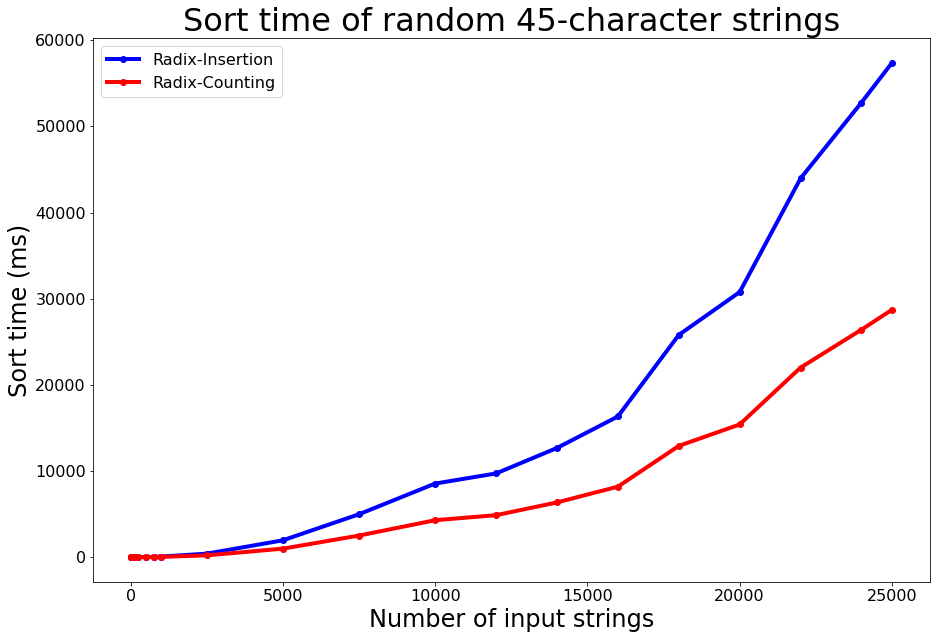

In [44]:
key = 45

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

x = i_piv.index
y_i  = i_piv[key]
y_c = c_piv[key]


plt.plot(x, y_i, '-ob', linewidth=4)
plt.plot(x, y_c, '-or', linewidth=4)

ax.set_title('Sort time of random 45-character strings', fontsize=32)
ax.set_xlabel('Number of input strings', fontsize=24)
ax.set_ylabel('Sort time (ms)', fontsize=24)
ax.legend(['Radix-Insertion', 'Radix-Counting'], fontsize=16)

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

In [45]:
algorithms = ['RADIX_COUNTING', 'RADIX_INSERTION']
reference = 25

In [64]:
piv_scaled = piv.copy()
for algorithm in algorithms:
    piv_scaled.loc[:, [algorithm]] = piv_scaled.loc[:, [algorithm]].divide(piv_scaled[(algorithm, reference)], axis=0)
piv_scaled

algorithm     RADIX_COUNTING                     RADIX_INSERTION            \
string_length             25        35        45              25        35   
num_strings                                                                  
10                       NaN       NaN       NaN             NaN       NaN   
25                       NaN       NaN       NaN             NaN       NaN   
50                       NaN       NaN       NaN             NaN       NaN   
75                       NaN       NaN       NaN             NaN       NaN   
100                      NaN       NaN       NaN             NaN       NaN   
250                      NaN       NaN       NaN             NaN       NaN   
500                      NaN       NaN       NaN             1.0  1.428571   
750                      NaN       NaN       NaN             1.0  1.000000   
1000                     NaN       NaN       NaN             1.0  1.500000   
2500                     NaN       NaN       NaN             1.0  1.394619   
5000                     NaN       inf       inf             1.0  1.412607   
7500                     1.0  1.000000  2.000000             1.0  1.418561   
10000                    1.0  2.000000  2.700000             1.0  1.343829   
12000                    1.0  1.000000  1.000000             1.0  1.065286   
14000                    1.0  1.176471  1.411765             1.0  1.336389   
16000                    1.0  2.000000  2.900000             1.0  1.347802   
18000                    1.0  1.333333  1.666667             1.0  1.410396   
20000                    1.0  1.200000  1.500000             1.0  1.377655   
22000                    1.0  1.000000  1.500000             1.0  1.465406   
24000                    1.0  1.000000  1.363636             1.0  1.436731   
25000                    1.0  1.550000  2.350000             1.0  1.397962   

algorithm                
string_length        45  
num_strings              
10                  NaN  
25                  NaN  
50                  NaN  
75                  NaN  
100                 NaN  
250                 NaN  
500            1.428571  
750            1.500000  
1000           1.966667  
2500           1.793722  
5000           1.863419  
7500           1.885606  
10000          1.670057  
12000          1.332053  
14000          1.636105  
16000          1.771460  
18000          2.230756  
20000          1.684311  
22000          1.956396  
24000          1.859755  
25000          1.832492

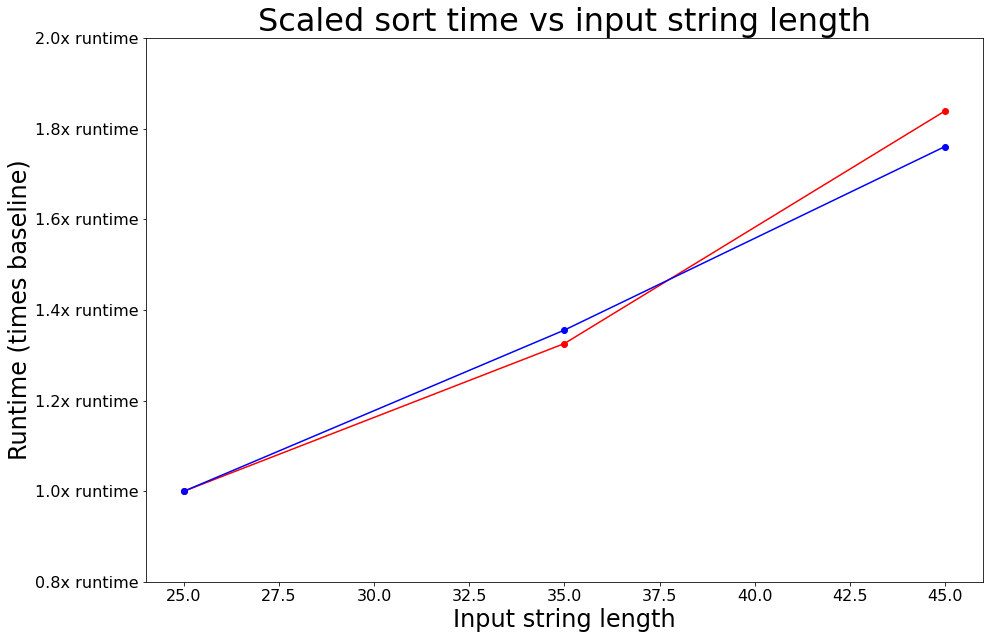

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

colors = ['r', 'b']

x = (25, 35, 45)
for algorithm, color in zip(algorithms, colors):
    part = piv_scaled[algorithm]
    not_na = part[~part.isna().any(axis=1)].mean()
#     for row in not_na.itertuples(index=False):
    plt.plot(x, not_na, f'-{color}o')
    
ax.set_title('Scaled sort time vs input string length', fontsize=32)
ax.set_xlabel('Input string length', fontsize=24)
ax.set_ylabel('Runtime (times baseline)', fontsize=24)
# ax.legend(['Insertion Improved Sort', '1.8e-4 * n + 20', '1.8e-4 * n'], fontsize=16)

plt.xticks(fontsize=16);
plt.yticks(ticks=ax.get_yticks(), labels=[f'{round(tick, 2)}x runtime' for tick in ax.get_yticks()], fontsize=16);
   

In [73]:
not_na.mean()

string_length
25    1.000000
35    1.355721
45    1.760758
dtype: float64

In [47]:
[f'{tick}x runtime' for tick in ax.get_yticks()]

['0.0x runtime',
 '1.0x runtime',
 '2.0x runtime',
 '3.0x runtime',
 '4.0x runtime',
 '5.0x runtime',
 '6.0x runtime']

[1.0, 1.94006435567709, 3.84424600134369]